In [1]:
%matplotlib notebook
import os
import tarfile
import urllib

In [2]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
DOWNLOAD_ROOT = 'https://raw.githubusercontent.com/ageron/handson-ml2/master/'
HOUSING_PATH = os.path.join("datasets" , "housing")
HOUSING_URL = DOWNLOAD_ROOT + 'datasets/housing/housing.tgz'

In [4]:
def fetch_housing_data(housing_url = HOUSING_URL , housing_path = HOUSING_PATH):
    os.makedirs(housing_path , exist_ok=True)
    tgz_path = os.path.join(housing_path+'housing.tgz')
    urllib.request.urlretrieve(housing_url , tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path = housing_path)
    housing_tgz.close()

In [5]:
fetch_housing_data()

# Extracting The Data

In [6]:
def load_data(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path , 'housing.csv')
    return pd.read_csv(csv_path)

In [7]:
housing = load_data()

In [8]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
housing.shape

(20640, 10)

In [10]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [11]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [12]:
housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [13]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<IPython.core.display.Javascript object>


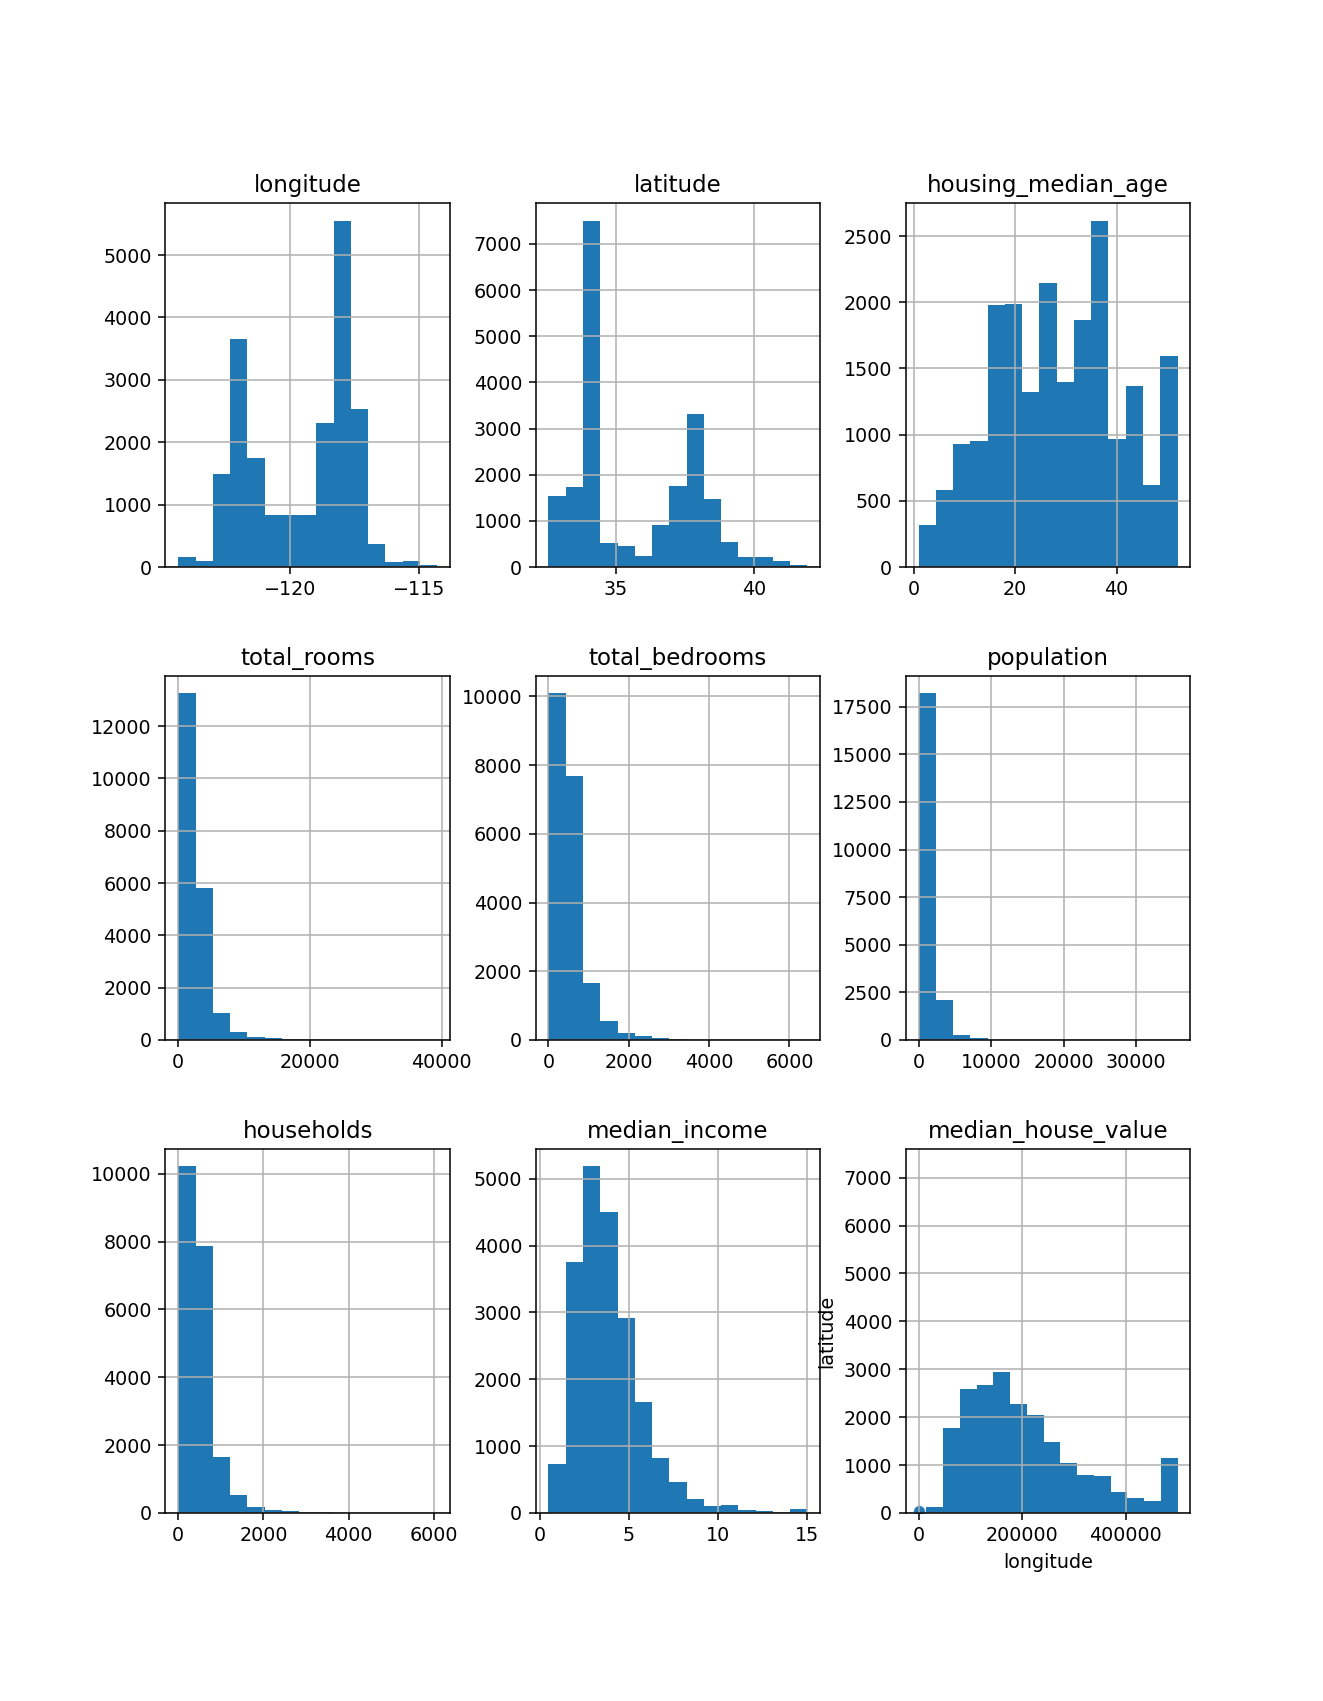

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

In [14]:
housing.hist(bins = 15 , figsize = (7 , 9))


# Creating a Test and Train Data

In [15]:
train_set , test_set = train_test_split(housing , test_size = 0.2 ,random_state = 42)

In [16]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND


# Stratified Sampling 

In [17]:
housing['income_cat'] = pd.cut(housing['median_income'] , bins = [0 , 1.5 , 3.0 , 4.5 , 6. , np.inf] , labels = [1, 2, 3, 4, 5])

In [18]:
housing['income_cat'].hist()

<AxesSubplot:title={'center':'median_house_value'}>

In [19]:
split = StratifiedShuffleSplit(n_splits= 1 , test_size = 0.2  , random_state = 42)
for train_idx , test_idx in split.split(housing , housing['income_cat']):
    strata_train_set = housing.loc[train_idx]
    strata_test_set = housing.loc[test_idx]

In [20]:
strata_test_set['income_cat'].value_counts()/len(strata_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [21]:
for set_ in (strata_test_set , strata_train_set) :
    set_.drop("income_cat" , axis = 1 , inplace = True)

In [22]:
strata_test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN
10970,-117.86,33.77,39.0,4159.0,655.0,1669.0,651.0,4.6111,240300.0,<1H OCEAN
20351,-119.05,34.21,27.0,4357.0,926.0,2110.0,876.0,3.0119,218200.0,<1H OCEAN
6568,-118.15,34.20,52.0,1786.0,306.0,1018.0,322.0,4.1518,182100.0,INLAND
13285,-117.68,34.07,32.0,1775.0,314.0,1067.0,302.0,4.0375,121300.0,INLAND


# Data Visualization

In [23]:
housing = strata_train_set.copy()

In [24]:
sns.scatterplot(x = housing['longitude'],  y = housing['latitude'] , alpha=0.1)

<AxesSubplot:title={'center':'median_house_value'}, xlabel='longitude', ylabel='latitude'>

<IPython.core.display.Javascript object>


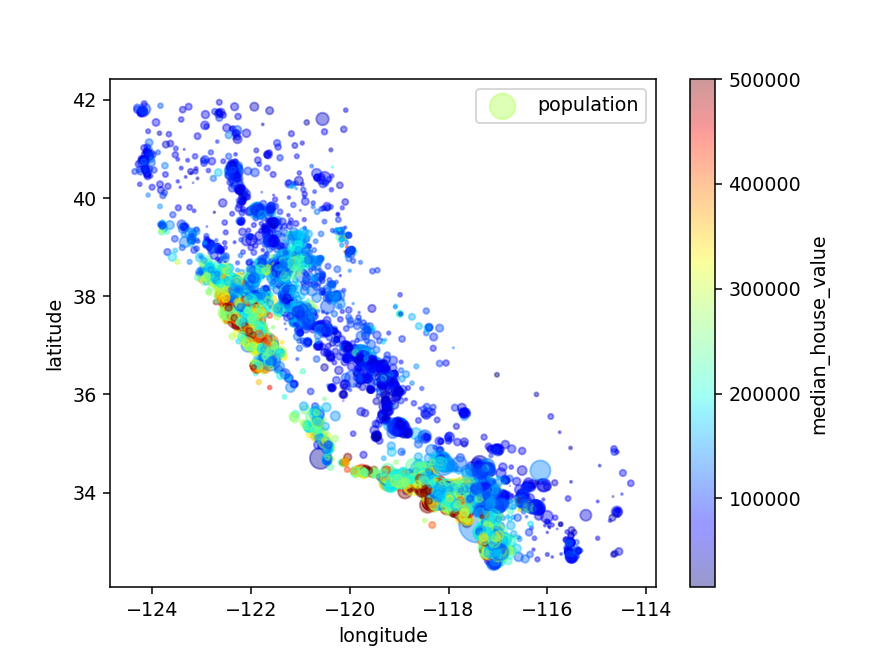

In [25]:
housing.plot(kind = 'scatter' , y = 'latitude' , x = 'longitude' , alpha = 0.4 , s = housing['population']/100 , label = 'population' , c ='median_house_value' , cmap = plt.get_cmap("jet") , colorbar = True)
plt.legend()

![image](https://upload.wikimedia.org/wikipedia/commons/5/55/California_Topography_and_Geomorphic.gif)

# Correlations

In [26]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [27]:
corr_matrix = housing.corr()

In [28]:
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

In [29]:
corr_matrix['median_house_value'].sort_values(ascending  = False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

<IPython.core.display.Javascript object>


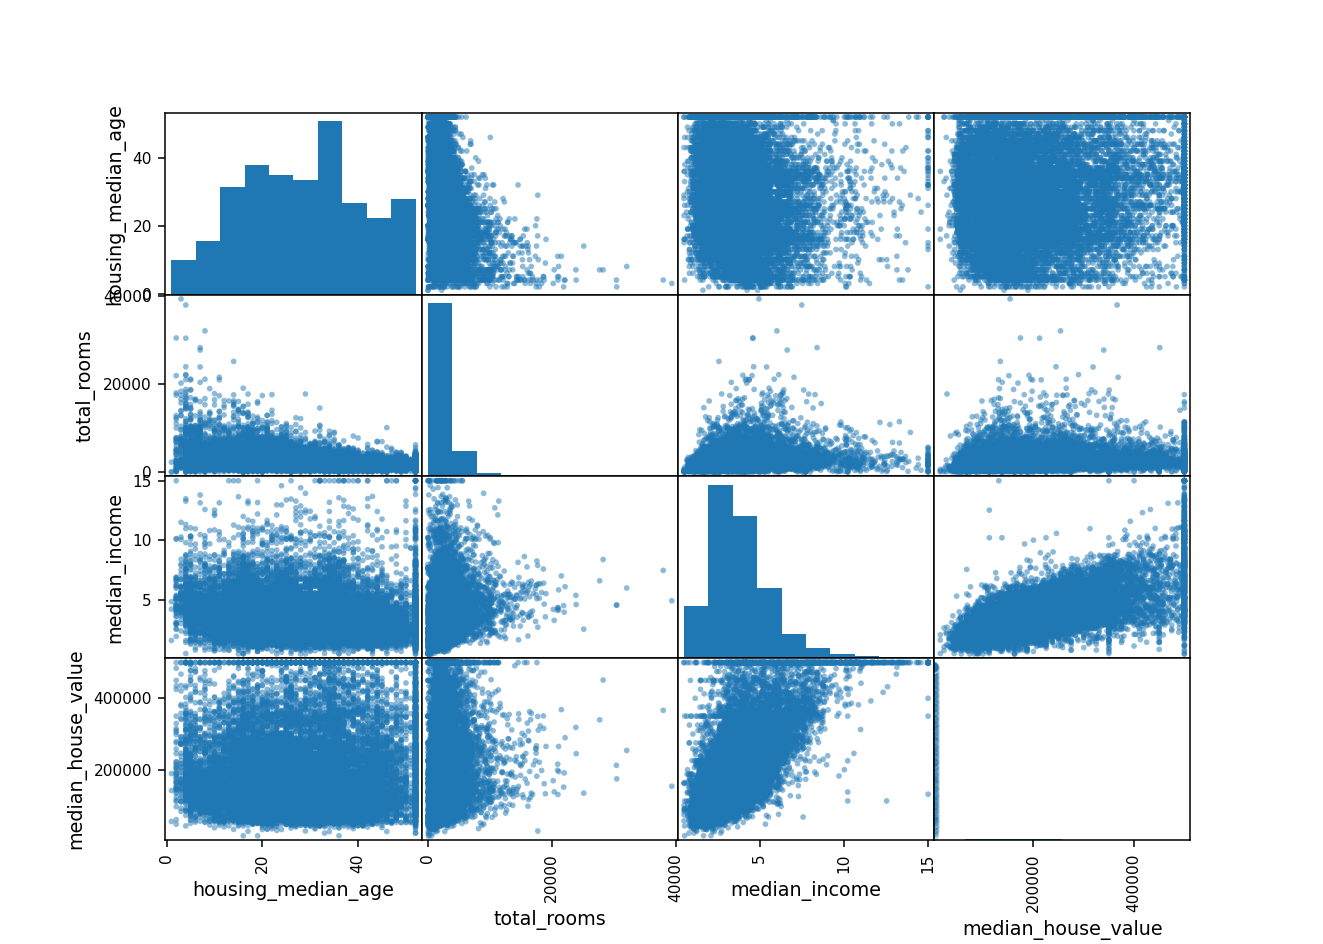

array([[<AxesSubplot:xlabel='housing_median_age', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_income', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>],
       [<AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_house_value', ylabel='median_income'>],
       [<AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms'

In [30]:
attributes = ['housing_median_age', 'total_rooms', 'median_income','median_house_value']
scatter_matrix(housing[attributes] , figsize = (7 , 5))

In [31]:
sns.scatterplot(x = housing['median_income'] , y = housing["median_house_value"] , alpha = 0.1)

<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>

# Feature Extraction 

In [32]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedroons_per_room'] =  housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

In [33]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending= False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedroons_per_room          -0.259984
Name: median_house_value, dtype: float64

# Creating Dataset

In [34]:
housing = strata_train_set.drop('median_house_value' ,axis = 1)
housing_labels = strata_train_set['median_house_value'].copy()

# Cleaning Data 

In [35]:
median = housing['total_bedrooms'].median()
housing['total_bedrooms'].fillna(median , inplace  = True)

## Using Imputer 

In [36]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

In [37]:
housing_num = housing.drop('ocean_proximity' , axis = 1)

In [38]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [39]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [40]:
housing_num.median()

longitude             -118.5100
latitude                34.2600
housing_median_age      29.0000
total_rooms           2119.5000
total_bedrooms         433.0000
population            1164.0000
households             408.0000
median_income            3.5409
dtype: float64

In [41]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [42]:
X = imputer.transform(housing_num)

# Handling Categorical Values

In [43]:
housing_cat = housing['ocean_proximity']
housing_cat.head()

17606     <1H OCEAN
18632     <1H OCEAN
14650    NEAR OCEAN
3230         INLAND
3555      <1H OCEAN
Name: ocean_proximity, dtype: object

In [44]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder(handle_unknown='ignore')

In [45]:
housing_cat_1hot = cat_encoder.fit_transform(housing[['ocean_proximity']])

In [46]:
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [47]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [48]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

# Creating Custom Transformers

In [49]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = [
    list(housing.columns).index(col)
    for col in ("total_rooms", "total_bedrooms", "population", "households")]

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kwargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)
            

# Pipelines

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [51]:
num_pipeline = Pipeline([
            ('imputer' , SimpleImputer(strategy='median')),
            ('attribs_adder' , CombinedAttributesAdder()),
            ('std_scaler' , StandardScaler())
                     
])

In [52]:
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [53]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline  = ColumnTransformer([
    ('num', num_pipeline , num_attribs),
    ('cat' , OneHotEncoder() , cat_attribs)
])

In [54]:
housing_prepared  = full_pipeline.fit_transform(housing)

# Training and Evaluating

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
lin_reg  = LinearRegression()
lin_reg.fit(housing_prepared , housing_labels)

LinearRegression()

In [57]:
from sklearn.metrics import mean_squared_error

In [58]:
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels , housing_predictions)
lin_mse = np.sqrt(lin_mse)

In [59]:
lin_mse

68628.19819848922

In [60]:
int(lin_mse)

68628

In [61]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared , housing_labels)

DecisionTreeRegressor()

In [63]:
housing_pred = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels ,housing_labels)

In [65]:
tree_mse

0.0

# Cross Validation 

In [66]:
from sklearn.model_selection import cross_val_score

In [73]:
scores = cross_val_score(tree_reg , housing_prepared , housing_labels , cv = 10 )
tree_mse_scores = np.sqrt(scores)

In [74]:
def display_scores(scores):
    print("Scores : ",scores)
    print()
    print("Mean : ",scores.mean())
    print()
    print("Standard Deviation : " , scores.std())

In [75]:
display_scores(scores)

Scores :  [0.60838175 0.67757878 0.63012491 0.64738472 0.62193615 0.59036403
 0.61417711 0.63416789 0.56863668 0.6456896 ]

Mean :  0.6238441616555489

Standard Deviation :  0.029274187848424203


In [76]:
lin_scores = cross_val_score(lin_reg, housing_prepared , housing_labels , cv = 10 )
display_scores(lin_scores)

Scores :  [0.62810772 0.67366246 0.62569782 0.59558993 0.65206084 0.63573031
 0.68070897 0.66309703 0.6262189  0.64803579]

Mean :  0.6428909748300279

Standard Deviation :  0.02444728212205089


In [77]:
from sklearn.ensemble import RandomForestRegressor

In [78]:
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared , housing_labels)

RandomForestRegressor()

In [79]:
forest_reg_scores = cross_val_score(forest_reg , housing_prepared , housing_labels , cv = 10)

In [80]:
display_scores(forest_reg_scores)

Scores :  [0.79513668 0.83463106 0.81039589 0.80286564 0.81691334 0.79246415
 0.8186266  0.834434   0.79752769 0.80668176]

Mean :  0.8109676803675331

Standard Deviation :  0.014361782295304215


# Saving Model Using Joblib

In [81]:
import joblib

In [82]:
joblib.dump(forest_reg ,"Forest_Reg_Model")

['Forest_Reg_Model']

# Fine Tune Model

In [83]:
from sklearn.model_selection import GridSearchCV

In [84]:
params_grid = [{
    'n_estimators': [3 , 10 , 30],
    'max_features' : [2 , 4 , 6 , 8],
    'bootstrap' : [False],
    'n_estimators' : [3 , 10],
    'max_features' : [2 ,3 , 4]
}]

In [85]:
forest_regressor_new = RandomForestRegressor()

In [99]:
grid_search = GridSearchCV(forest_reg , params_grid , cv = 5 , scoring = 'neg_mean_squared_error', return_train_score = False) 

In [100]:
grid_search.fit(housing_prepared , housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [101]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 4, 'n_estimators': 10}

In [102]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=4, n_estimators=10)

In [104]:
final_model = grid_search.best_estimator_

In [105]:
X_test = strata_test_set.drop("median_house_value" , axis = 1)
Y_test = strata_test_set["median_house_value"].copy()

In [109]:
X_test_prepared = full_pipeline.transform(X_test)

In [110]:
final_predictions = final_model.predict(X_test_prepared)

In [111]:
final_mse  = mean_squared_error(Y_test  , final_predictions)
final_rmse = np.sqrt(final_mse)

In [112]:
final_rmse

49938.64038773348

In [113]:
from scipy import stats

In [114]:
confidence = 0.95
squared_errors = (final_predictions - Y_test)**2

In [115]:
np.sqrt(stats.t.interval(confidence , len(squared_errors)-1 , loc = squared_errors.mean() , scale = stats.sem(squared_errors)))

array([47944.35940934, 51856.28224602])